In [574]:
# Importing essential libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [576]:
# Load the dataset
df = pd.read_csv(r"D:\First_Q_project\Vehicle Collision.csv")

# Display basic info about the dataset
df.head()

C:\Users\ANAS\AppData\Local\Temp\ipykernel_26004\4039535456.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\First_Q_project\Vehicle Collision.csv")


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10253606,4230743.0,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,27.0,Not Ejected,...,Back,Driver,Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Driver,NaN,NaN,M
1,10248708,4229547.0,10/26/2019,01:15,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,NaN,24.0,NaN,...,Shoulder - Upper Arm,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,Unspecified,F
2,10254556,4230715.0,10/26/2019,08:50,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832.0,42.0,Not Ejected,...,Knee-Lower Leg Foot,Driver,Unknown,NaN,NaN,None Visible,Driver,NaN,NaN,M
3,10250834,4230376.0,10/26/2019,19:40,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949.0,36.0,Not Ejected,...,Back,Driver,NaN,NaN,NaN,Internal,Driver,NaN,NaN,M
4,10252474,4229773.0,10/26/2019,16:50,4bf13d12-8d7a-4cb0-997f-dd6a8b1adca6,Occupant,Injured,19142773.0,50.0,Not Ejected,...,Head,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F


In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230660 entries, 0 to 230659
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   UNIQUE_ID              230660 non-null  object 
 1   COLLISION_ID           230656 non-null  float64
 2   CRASH_DATE             230656 non-null  object 
 3   CRASH_TIME             230656 non-null  object 
 4   PERSON_ID              230653 non-null  object 
 5   PERSON_TYPE            230656 non-null  object 
 6   PERSON_INJURY          230656 non-null  object 
 7   VEHICLE_ID             181937 non-null  float64
 8   PERSON_AGE             229663 non-null  float64
 9   EJECTION               102787 non-null  object 
 10  EMOTIONAL_STATUS       126918 non-null  object 
 11  BODILY_INJURY          126959 non-null  object 
 12  POSITION_IN_VEHICLE    102906 non-null  object 
 13  SAFETY_EQUIPMENT       90120 non-null   object 
 14  PED_LOCATION           26292 non-nul

<h4>Data Cleaning</h4>

In [580]:
# Checking missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                       Missing Values  Percentage
BODILY_INJURY                  103701   44.958380
COLLISION_ID                        4    0.001734
COMPLAINT                      103687   44.952311
CONTRIBUTING_FACTOR_1          205452   89.071360
CONTRIBUTING_FACTOR_2          205477   89.082199
CRASH_DATE                          4    0.001734
CRASH_TIME                          4    0.001734
EJECTION                       127873   55.437874
EMOTIONAL_STATUS               103742   44.976155
PED_ACTION                     204430   88.628284
PED_LOCATION                   204368   88.601405
PED_ROLE                       103687   44.952311
PERSON_AGE                        997    0.432238
PERSON_ID                           7    0.003035
PERSON_INJURY                       4    0.001734
PERSON_SEX                     103768   44.987427
PERSON_TYPE                         4    0.001734
POSITION_IN_VEHICLE            127754   55.386283
SAFETY_EQUIPMENT               140540   60.929507


In [581]:
# Dropping columns with more than 80% missing values
columns_to_drop = [
    'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
    'PED_ACTION', 'PED_LOCATION','UNIQUE_ID','COLLISION_ID'
]
df.drop(columns=columns_to_drop, inplace=True)


In [582]:
# Filling categorical missing values with "Unknown"
fill_cols = ['BODILY_INJURY', 'COMPLAINT', 'EMOTIONAL_STATUS',
             'PERSON_SEX', 'PED_ROLE', 'EJECTION', 'SAFETY_EQUIPMENT', 'POSITION_IN_VEHICLE']

for col in fill_cols:
    df[col].fillna("Unknown", inplace=True)

In [583]:
# Filling PERSON_AGE with median value
df['PERSON_AGE'].fillna(df['PERSON_AGE'].median(), inplace=True)

# Dropping VEHICLE_ID since it's not critical
df.drop(columns=['VEHICLE_ID'], inplace=True)

In [585]:
df.shape

(230660, 14)

In [587]:
# Dropping rows with very few missing values
df.dropna(subset=['CRASH_DATE', 'CRASH_TIME', 'PERSON_ID', 'PERSON_INJURY', 'PERSON_TYPE'], inplace=True)


In [588]:
# Create a DataFrame showing missing value count and percentage
missing_data = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Percentage', ascending=False)

# Display missing data
print(missing_data)

                     Missing Values  Percentage
CRASH_DATE                        0         0.0
CRASH_TIME                        0         0.0
PERSON_ID                         0         0.0
PERSON_TYPE                       0         0.0
PERSON_INJURY                     0         0.0
PERSON_AGE                        0         0.0
EJECTION                          0         0.0
EMOTIONAL_STATUS                  0         0.0
BODILY_INJURY                     0         0.0
POSITION_IN_VEHICLE               0         0.0
SAFETY_EQUIPMENT                  0         0.0
COMPLAINT                         0         0.0
PED_ROLE                          0         0.0
PERSON_SEX                        0         0.0


In [589]:
df.describe()

,PERSON_AGE
count,230653.000000
mean,36.459348
std,84.742474
min,-997.000000
25%,23.000000
50%,33.000000
75%,49.000000
max,9999.000000


In [592]:
df['CRASH_TIME'].head(20)

0     19:15
1     01:15
2     08:50
3     19:40
4     16:50
5          
6     12:06
7     00:05
8     15:40
9     03:06
10    17:15
11    10:43
12    19:56
13    06:23
14    06:54
15    03:50
16    19:56
17    02:29
18    22:22
19    02:42
Name: CRASH_TIME, dtype: object

In [595]:
# Sample data
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')

# Convert to standard format (YYYY-MM-DD)
df['CRASH_DATE'] = df['CRASH_DATE'].dt.strftime('%Y-%m-%d')

print(df['CRASH_DATE'].head())

0    2019-10-24
1    2019-10-26
2    2019-10-26
3    2019-10-26
4    2019-10-26
Name: CRASH_DATE, dtype: object


In [597]:
df['CRASH_DATE'].isnull().sum()

90413

In [599]:
import pandas as pd

# Sample data
df['CRASH_TIME'] = df['CRASH_TIME'].str.strip()  # Clean up extra spaces

# Define function to categorize time
def categorize_time(time_str):
    # Convert string time to a datetime object to extract hour
    time_obj = pd.to_datetime(time_str, format='%H:%M')
    hour = time_obj.hour
    
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply function to categorize each time
df['CRASH_TIME_CATEGORY'] = df['CRASH_TIME'].apply(categorize_time)

# Check results
print(df[['CRASH_TIME', 'CRASH_TIME_CATEGORY']].head())


  CRASH_TIME CRASH_TIME_CATEGORY
0      19:15             Evening
1      01:15               Night
2      08:50             Morning
3      19:40             Evening
4      16:50           Afternoon


In [602]:
df.isnull().sum()

CRASH_DATE             90413
CRASH_TIME                 0
PERSON_ID                  0
PERSON_TYPE                0
PERSON_INJURY              0
PERSON_AGE                 0
EJECTION                   0
EMOTIONAL_STATUS           0
BODILY_INJURY              0
POSITION_IN_VEHICLE        0
SAFETY_EQUIPMENT           0
COMPLAINT                  0
PED_ROLE                   0
PERSON_SEX                 0
CRASH_TIME_CATEGORY        0
dtype: int64

In [605]:
# Forward fill
df['CRASH_DATE'] = df['CRASH_DATE'].fillna(method='ffill')

# Or backward fill
df['CRASH_DATE'] = df['CRASH_DATE'].fillna(method='bfill')

C:\Users\ANAS\AppData\Local\Temp\ipykernel_26004\3347072095.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CRASH_DATE'] = df['CRASH_DATE'].fillna(method='ffill')
C:\Users\ANAS\AppData\Local\Temp\ipykernel_26004\3347072095.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CRASH_DATE'] = df['CRASH_DATE'].fillna(method='bfill')


In [608]:
df['PERSON_INJURY'].value_counts()

PERSON_INJURY
Injured    229630
Killed       1023
Name: count, dtype: int64

There i find out my Person_age column is really fucked_up so i need to fix this too

          PERSON_AGE
count  230653.000000
mean       36.459348
std        84.742474
min      -997.000000
25%        23.000000
50%        33.000000
75%        49.000000
max      9999.000000


<Axes: >

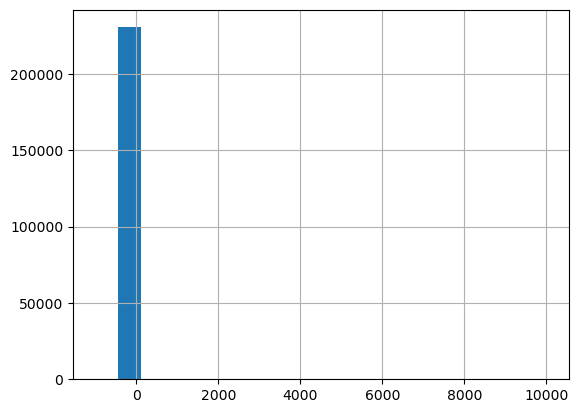

In [610]:
# Summary statistics for numerical features
print(df.describe())

# Plot histogram for numerical features
df['PERSON_AGE'].hist(bins=20)


In [611]:
df['PERSON_AGE'].head(10)

0    27.0
1    24.0
2    42.0
3    36.0
4    50.0
5    36.0
6     3.0
7    35.0
8    32.0
9    51.0
Name: PERSON_AGE, dtype: float64

In [612]:
# Convert age to integer
df['PERSON_AGE'] = df['PERSON_AGE'].astype(int)

# Check the conversion
print(df['PERSON_AGE'].max())

9999


In [613]:
# Optionally, filter out rows with unrealistic age values
df = df[df['PERSON_AGE'] < 80]  # Assuming ages above 120 are invalid

In [614]:
df['PERSON_AGE'].max()

79

I have age 0-9999

In [616]:
# Plot histogram for numerical features
df['PERSON_AGE'].describe()

count    227440.000000
mean         34.638318
std          20.861909
min        -997.000000
25%          23.000000
50%          33.000000
75%          48.000000
max          79.000000
Name: PERSON_AGE, dtype: float64

In [617]:
# Step 1: Replace negative ages and -999 with NaN
df['PERSON_AGE'] = df['PERSON_AGE'].replace([-999, -np.inf], np.nan)

# Step 2: Remove rows where age is negative or over 80 (you can adjust this threshold as needed)
df = df[df['PERSON_AGE'] >= 0]  # Remove negative ages
df = df[df['PERSON_AGE'] <= 80]  # Keep ages within the 0-80 range

# Optionally, impute missing values (e.g., with the median)
df['PERSON_AGE'] = df['PERSON_AGE'].fillna(df['PERSON_AGE'].median())

In [618]:
# Plot histogram for numerical features
df['PERSON_AGE'].describe()

count    227405.000000
mean         34.759469
std          18.158001
min           0.000000
25%          23.000000
50%          33.000000
75%          48.000000
max          79.000000
Name: PERSON_AGE, dtype: float64

In [619]:
df.isnull().sum()

CRASH_DATE             0
CRASH_TIME             0
PERSON_ID              0
PERSON_TYPE            0
PERSON_INJURY          0
PERSON_AGE             0
EJECTION               0
EMOTIONAL_STATUS       0
BODILY_INJURY          0
POSITION_IN_VEHICLE    0
SAFETY_EQUIPMENT       0
COMPLAINT              0
PED_ROLE               0
PERSON_SEX             0
CRASH_TIME_CATEGORY    0
dtype: int64

In [620]:
# Step 1: Remove rows where PERSON_AGE is NaN or invalid
df = df[df['PERSON_AGE'] >= 0]  # Remove negative ages
df = df[df['PERSON_AGE'] <= 80]  # Keep ages within the 0-80 range

# Step 2: Recreate the AGE_CATEGORY column based on cleaned PERSON_AGE
bins = [0, 12, 35, 64, 80]
labels = ['Kid', 'Young Adult', 'Adult', 'Old']
df['AGE_CATEGORY'] = pd.cut(df['PERSON_AGE'], bins=bins, labels=labels, right=True)

# Step 3: Check for any NaN values in AGE_CATEGORY (this should be rare now)
df = df.dropna(subset=['AGE_CATEGORY'])

# Optionally, check the cleaned AGE_CATEGORY column
print(df[['PERSON_AGE', 'AGE_CATEGORY']].head())


   PERSON_AGE AGE_CATEGORY
0          27  Young Adult
1          24  Young Adult
2          42        Adult
3          36        Adult
4          50        Adult


<h4>EDA Part</h4>

          PERSON_AGE
count  217661.000000
mean       36.315541
std        16.969485
min         1.000000
25%        24.000000
50%        34.000000
75%        49.000000
max        79.000000


C:\Users\ANAS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


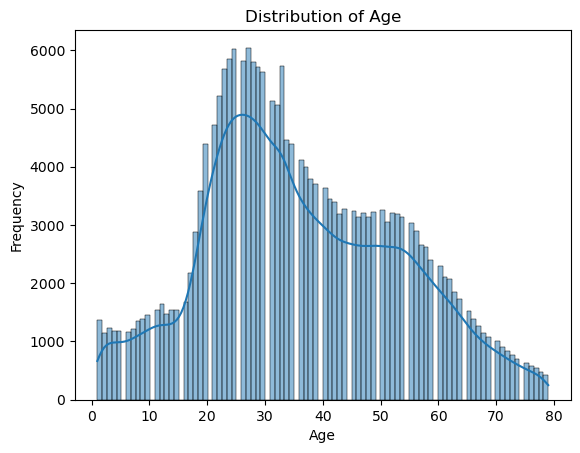

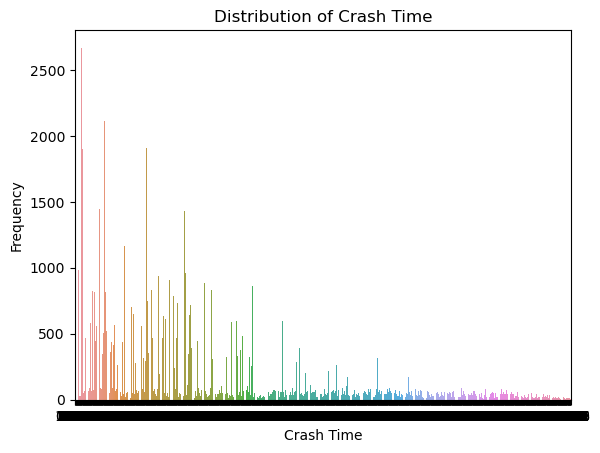

In [622]:
# Summary statistics for numerical features
print(df.describe())

# Histogram for numeric variables (e.g., AGE, CRASH_TIME)
import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution
sns.histplot(df['PERSON_AGE'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Crash Time Distribution (if it's converted to a categorical feature like morning, evening, etc.)
sns.countplot(x='CRASH_TIME', data=df)
plt.title('Distribution of Crash Time')
plt.xlabel('Crash Time')
plt.ylabel('Frequency')
plt.show()


In [623]:
df['CRASH_TIME'].describe()

count     217661
unique      1441
top        17:00
freq        2668
Name: CRASH_TIME, dtype: object

PERSON_TYPE
Occupant           155025
Pedestrian          45047
Bicyclist           17549
Other Motorized        40
Name: count, dtype: int64


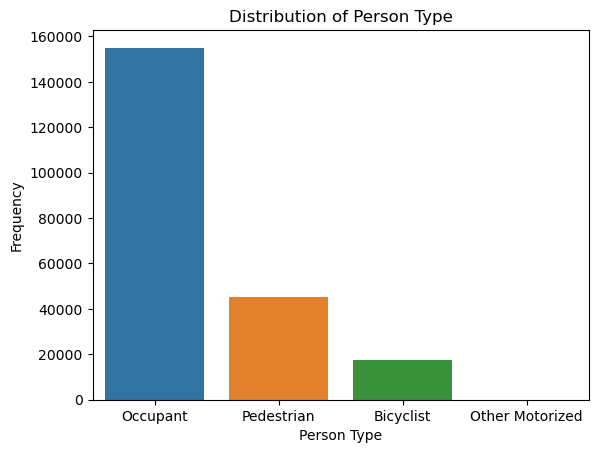

In [624]:
# Frequency count for categorical features
print(df['PERSON_TYPE'].value_counts())

# Visualize the categorical variables
sns.countplot(x='PERSON_TYPE', data=df)
plt.title('Distribution of Person Type')
plt.xlabel('Person Type')
plt.ylabel('Frequency')
plt.show()

# You can repeat this for other categorical columns like EMOTIONAL_STATUS, PERSON_INJURY, etc.


In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217661 entries, 0 to 230655
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   CRASH_DATE           217661 non-null  object  
 1   CRASH_TIME           217661 non-null  object  
 2   PERSON_ID            217661 non-null  object  
 3   PERSON_TYPE          217661 non-null  object  
 4   PERSON_INJURY        217661 non-null  object  
 5   PERSON_AGE           217661 non-null  int32   
 6   EJECTION             217661 non-null  object  
 7   EMOTIONAL_STATUS     217661 non-null  object  
 8   BODILY_INJURY        217661 non-null  object  
 9   POSITION_IN_VEHICLE  217661 non-null  object  
 10  SAFETY_EQUIPMENT     217661 non-null  object  
 11  COMPLAINT            217661 non-null  object  
 12  PED_ROLE             217661 non-null  object  
 13  PERSON_SEX           217661 non-null  object  
 14  CRASH_TIME_CATEGORY  217661 non-null  object  
 15  AGE_C

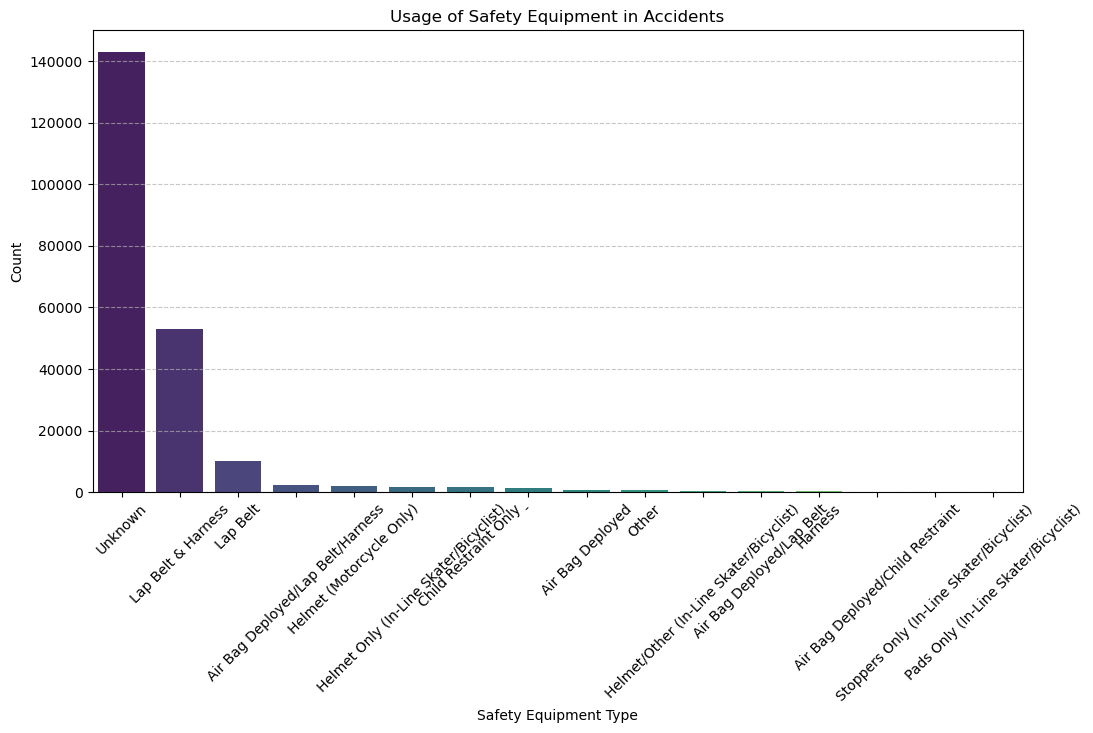

In [626]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each safety equipment type
safety_counts = df["SAFETY_EQUIPMENT"].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=safety_counts.index, y=safety_counts.values, palette="viridis")

# Add labels
plt.title("Usage of Safety Equipment in Accidents")
plt.xlabel("Safety Equipment Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [628]:
# Step 1: Initialize the LabelEncoder
le = LabelEncoder()

# Step 2: Encode the 'PERSON_INJURY' column (or any categorical column)
df['PERSON_INJURY'] = le.fit_transform(df['PERSON_INJURY'])

# Verify the encoding
print(df['PERSON_INJURY'].value_counts())

PERSON_INJURY
0    216777
1       884
Name: count, dtype: int64


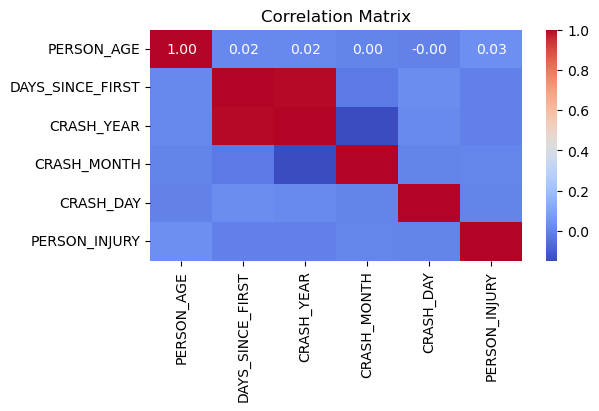

In [667]:
# Step 1: Convert CRASH_DATE to datetime format
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')

# Step 2: Extract useful features (like year, month, or the number of days since the earliest date)
df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year
df['CRASH_MONTH'] = df['CRASH_DATE'].dt.month
df['CRASH_DAY'] = df['CRASH_DATE'].dt.day
df['DAYS_SINCE_FIRST'] = (df['CRASH_DATE'] - df['CRASH_DATE'].min()).dt.days  # Number of days since the first crash

# Now you can use the new columns in the correlation matrix
correlation_matrix = df[['PERSON_AGE', 'DAYS_SINCE_FIRST', 'CRASH_YEAR', 'CRASH_MONTH', 'CRASH_DAY', 'PERSON_INJURY']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


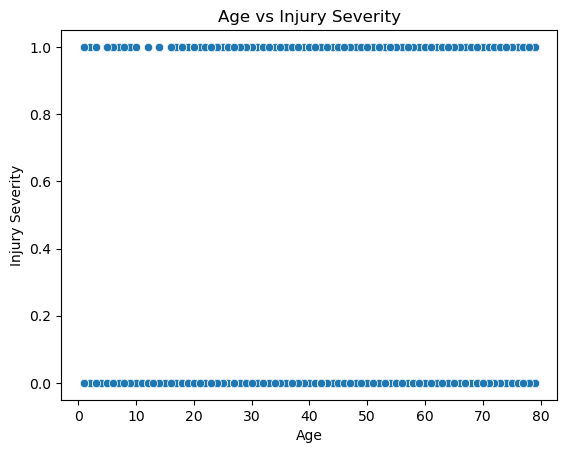

In [630]:
# Scatter plot for age vs severity (if PERSON_INJURY is a numeric or binary target)
sns.scatterplot(x='PERSON_AGE', y='PERSON_INJURY', data=df)
plt.title('Age vs Injury Severity')
plt.xlabel('Age')
plt.ylabel('Injury Severity')
plt.show()

In [631]:
df['PERSON_TYPE'].unique()

array(['Occupant', 'Pedestrian', 'Bicyclist', 'Other Motorized'],
      dtype=object)

In [632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217661 entries, 0 to 230655
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CRASH_DATE           217661 non-null  datetime64[ns]
 1   CRASH_TIME           217661 non-null  object        
 2   PERSON_ID            217661 non-null  object        
 3   PERSON_TYPE          217661 non-null  object        
 4   PERSON_INJURY        217661 non-null  int32         
 5   PERSON_AGE           217661 non-null  int32         
 6   EJECTION             217661 non-null  object        
 7   EMOTIONAL_STATUS     217661 non-null  object        
 8   BODILY_INJURY        217661 non-null  object        
 9   POSITION_IN_VEHICLE  217661 non-null  object        
 10  SAFETY_EQUIPMENT     217661 non-null  object        
 11  COMPLAINT            217661 non-null  object        
 12  PED_ROLE             217661 non-null  object        
 13  PERSON_SEX         

In [633]:
df['EJECTION'].unique()

array(['Not Ejected', 'Unknown', 'Ejected', 'Does Not Apply', 'Trapped',
       'Partially Ejected'], dtype=object)

In [634]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['EJECTION_New'] = encoder.fit_transform(df['EJECTION'])
df['EJECTION_New'] = df['EJECTION_New'].astype(int)


Not Ejected        → 0  
Partially Ejected  → 1  
Ejected           → 2  
Unknown           → 3  
Does Not Apply    → 4  
Trapped           → 5  


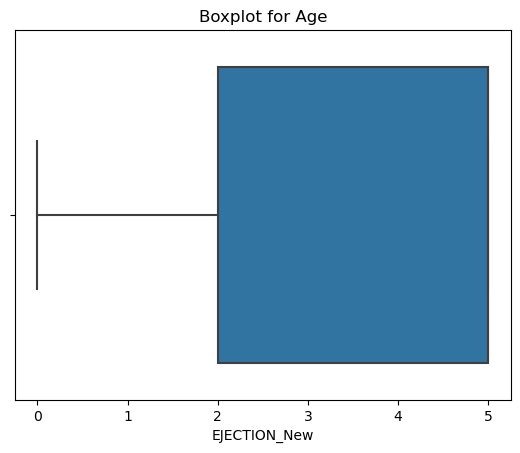

In [637]:
# Boxplot for numerical variables to check for outliers
sns.boxplot(x=df['EJECTION_New'])
plt.title('Boxplot for Age')
plt.show()

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217661 entries, 0 to 230655
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   PERSON_TYPE           217661 non-null  int32
 1   PERSON_INJURY         217661 non-null  int32
 2   PERSON_AGE            217661 non-null  int32
 3   EJECTION              217661 non-null  int32
 4   EMOTIONAL_STATUS      217661 non-null  int32
 5   BODILY_INJURY         217661 non-null  int32
 6   POSITION_IN_VEHICLE   217661 non-null  int32
 7   COMPLAINT             217661 non-null  int32
 8   PED_ROLE              217661 non-null  int32
 9   PERSON_SEX            217661 non-null  int32
 10  CRASH_TIME_CATEGORY   217661 non-null  int32
 11  AGE_CATEGORY          217661 non-null  int32
 12  CRASH_YEAR            217661 non-null  int32
 13  CRASH_MONTH           217661 non-null  int32
 14  CRASH_DAY             217661 non-null  int32
 15  DAYS_SINCE_FIRST      217661 non-null  

In [201]:
gender_counts = df['PERSON_SEX'].value_counts(normalize=True) * 100
print(gender_counts)


PERSON_SEX
Unknown    43.249824
M          31.202650
F          25.433128
U           0.114398
Name: proportion, dtype: float64


In [203]:
df['PERSON_SEX'] = df['PERSON_SEX'].replace({'U': 'Unknown'})


In [205]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['PERSON_SEX'] = encoder.fit_transform(df['PERSON_SEX'])  # Example for gender


In [207]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['CRASH_TIME_CATEGORY', 'AGE_CATEGORY'], drop_first=True)

In [209]:
# Ensure CRASH_TIME is in string format before conversion
df_encoded['CRASH_HOUR'] = pd.to_datetime(df_encoded['CRASH_TIME'], format='%H:%M').dt.hour
df_encoded['CRASH_MINUTE'] = pd.to_datetime(df_encoded['CRASH_TIME'], format='%H:%M').dt.minute

# Drop the original CRASH_TIME column
df_encoded.drop(columns=['CRASH_TIME'], inplace=True)

# Convert all boolean columns to integers (0 and 1)
df_encoded = df_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Check final data types
print(df_encoded.dtypes)



C:\Users\ANAS\AppData\Local\Temp\ipykernel_26004\3767245268.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)


CRASH_DATE                     datetime64[ns]
PERSON_ID                              object
PERSON_TYPE                            object
PERSON_INJURY                           int64
PERSON_AGE                              int64
EJECTION                               object
EMOTIONAL_STATUS                       object
BODILY_INJURY                          object
POSITION_IN_VEHICLE                    object
SAFETY_EQUIPMENT                       object
COMPLAINT                              object
PED_ROLE                               object
PERSON_SEX                              int64
CRASH_YEAR                              int64
CRASH_MONTH                             int64
CRASH_DAY                               int64
DAYS_SINCE_FIRST                        int64
EJECTION_New                            int64
CRASH_TIME_CATEGORY_Evening             int64
CRASH_TIME_CATEGORY_Morning             int64
CRASH_TIME_CATEGORY_Night               int64
AGE_CATEGORY_Young Adult          

In [211]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to multiple categorical columns
categorical_cols = ['EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE', 
                    'SAFETY_EQUIPMENT', 'COMPLAINT', 'PED_ROLE']

label_encoders = {}  # Dictionary to store encoders

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoder for inverse transformation if needed


In [213]:
df['CRASH_TIME_CATEGORY']

0           Evening
1             Night
2           Morning
3           Evening
4         Afternoon
            ...    
230650        Night
230651      Evening
230652      Morning
230653    Afternoon
230655    Afternoon
Name: CRASH_TIME_CATEGORY, Length: 217661, dtype: object

In [215]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Transform the Column
df['CRASH_TIME_CATEGORY'] = label_encoder.fit_transform(df['CRASH_TIME_CATEGORY'])


In [217]:
df['CRASH_TIME_CATEGORY'] = df['CRASH_TIME_CATEGORY'].fillna(-1).astype(int)


<h4>Data Split</h4>

In [287]:
# Splitting data into train and test sets
X = df.drop(columns=['PERSON_INJURY'])  # Features
y = df['PERSON_INJURY']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

<h4>Encoding Bcos there is some data in Object form we need to change in int </h4>

In [221]:
# Convert 'CRASH_DATE' to datetime if not already in datetime format
df_encoded['CRASH_DATE'] = pd.to_datetime(df_encoded['CRASH_DATE'], errors='coerce')

# Extract features from 'CRASH_DATE' (e.g., year, month, day, weekday)
df_encoded['CRASH_YEAR'] = df_encoded['CRASH_DATE'].dt.year
df_encoded['CRASH_MONTH'] = df_encoded['CRASH_DATE'].dt.month
df_encoded['CRASH_DAY'] = df_encoded['CRASH_DATE'].dt.day
df_encoded['CRASH_WEEKDAY'] = df_encoded['CRASH_DATE'].dt.weekday


In [101]:
# Perform one-hot encoding on categorical variables
df = pd.get_dummies(df, columns=['PERSON_TYPE', 'SAFETY_EQUIPMENT', 'EMOTIONAL_STATUS'], drop_first=True)


In [223]:
from sklearn.preprocessing import LabelEncoder

cols = ['EJECTION', 'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'COMPLAINT', 'PED_ROLE']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


In [225]:
time_mapping = {
    'Late Night': 0,  # (12 AM - 6 AM)
    'Morning': 1,      # (6 AM - 12 PM)
    'Afternoon': 2,    # (12 PM - 6 PM)
    'Evening': 3       # (6 PM - 12 AM)
}

df['CRASH_TIME_CATEGORY'] = df['CRASH_TIME_CATEGORY'].map(time_mapping)


In [227]:
# Define mapping dictionary
age_mapping = {
    'Child': 0,
    'Teen': 1,
    'Adult': 2,
    'Senior': 3
}

# Apply mapping
df['AGE_CATEGORY'] = df['AGE_CATEGORY'].map(age_mapping)

# Fill NaN values (if any) before converting to integer
df['AGE_CATEGORY'] = df['AGE_CATEGORY'].fillna(-1).astype(int)


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217661 entries, 0 to 230655
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CRASH_DATE           217661 non-null  datetime64[ns]
 1   CRASH_TIME           217661 non-null  object        
 2   PERSON_ID            217661 non-null  object        
 3   PERSON_TYPE          217661 non-null  object        
 4   PERSON_INJURY        217661 non-null  int32         
 5   PERSON_AGE           217661 non-null  int32         
 6   EJECTION             217661 non-null  int32         
 7   EMOTIONAL_STATUS     217661 non-null  object        
 8   BODILY_INJURY        217661 non-null  int32         
 9   POSITION_IN_VEHICLE  217661 non-null  int32         
 10  SAFETY_EQUIPMENT     217661 non-null  object        
 11  COMPLAINT            217661 non-null  int32         
 12  PED_ROLE             217661 non-null  int32         
 13  PERSON_SEX         

In [119]:
# Convert multiple columns to int32
cols_to_convert = [
    'AGE_CATEGORY', 'CRASH_YEAR', 'CRASH_MONTH', 'CRASH_DAY', 
    'DAYS_SINCE_FIRST', 'EJECTION_New'
]

df[cols_to_convert]= df[cols_to_convert].astype('int32')


In [231]:
df[cols_to_convert] = df[cols_to_convert].fillna(-1).astype('int32')


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217661 entries, 0 to 230655
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   PERSON_TYPE           217661 non-null  int32
 1   PERSON_INJURY         217661 non-null  int32
 2   PERSON_AGE            217661 non-null  int32
 3   EJECTION              217661 non-null  int32
 4   EMOTIONAL_STATUS      217661 non-null  int32
 5   BODILY_INJURY         217661 non-null  int32
 6   POSITION_IN_VEHICLE   217661 non-null  int32
 7   COMPLAINT             217661 non-null  int32
 8   PED_ROLE              217661 non-null  int32
 9   PERSON_SEX            217661 non-null  int32
 10  CRASH_TIME_CATEGORY   217661 non-null  int32
 11  AGE_CATEGORY          217661 non-null  int32
 12  CRASH_YEAR            217661 non-null  int32
 13  CRASH_MONTH           217661 non-null  int32
 14  CRASH_DAY             217661 non-null  int32
 15  DAYS_SINCE_FIRST      217661 non-null  

In [281]:
df['PERSON_TYPE'].unique()

array(['Occupant', 'Pedestrian', 'Bicyclist', 'Other Motorized'],
      dtype=object)

In [283]:
from sklearn.preprocessing import LabelEncoder

# Initialize and apply Label Encoding
label_encoder = LabelEncoder()
df['PERSON_TYPE'] = label_encoder.fit_transform(df['PERSON_TYPE'])

# Show mapping
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


{'Bicyclist': 0, 'Occupant': 1, 'Other Motorized': 2, 'Pedestrian': 3}

In [277]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Apply encoding
df['EMOTIONAL_STATUS'] = label_encoder.fit_transform(df['EMOTIONAL_STATUS'])

# Show mapping
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


{'Apparent Death': 0,
 'Conscious': 1,
 'Does Not Apply': 2,
 'Incoherent': 3,
 'Semiconscious': 4,
 'Shock': 5,
 'Unconscious': 6,
 'Unknown': 7}

In [267]:
# Replace empty strings or NaNs with a default time (e.g., '00:00')
df['CRASH_TIME'] = df['CRASH_TIME'].replace('', '00:00').fillna('00:00')



In [269]:
df[['CRASH_HOUR', 'CRASH_MINUTE']] = df['CRASH_TIME'].str.split(':', expand=True)

# Convert to integer safely, forcing errors to NaN
df['CRASH_HOUR'] = pd.to_numeric(df['CRASH_HOUR'], errors='coerce').fillna(0).astype(int)
df['CRASH_MINUTE'] = pd.to_numeric(df['CRASH_MINUTE'], errors='coerce').fillna(0).astype(int)


In [271]:
df.drop(columns=['CRASH_TIME'], inplace=True)


In [247]:
# Define mapping manually
time_mapping = {
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
}

df['CRASH_TIME_CATEGORY'] = df['CRASH_TIME_CATEGORY'].map(time_mapping)

# Fill any NaNs with a default category (e.g., -1)
df['CRASH_TIME_CATEGORY'] = df['CRASH_TIME_CATEGORY'].fillna(-1).astype(int)


In [259]:
print(df[['SAFETY_EQUIPMENT', 'SAFETY_EQUIPMENT_New']].head())


     SAFETY_EQUIPMENT  SAFETY_EQUIPMENT_New
0  Lap Belt & Harness                     3
1             Unknown                     0
2             Unknown                     0
3             Unknown                     0
4  Lap Belt & Harness                     3


In [261]:
df.drop(columns=['SAFETY_EQUIPMENT'], inplace=True)


In [257]:
safety_mapping = {
    'Unknown': 0,
    '-': 0,  # Treat "-" as missing
    'Other': 1,
    'Lap Belt': 2,
    'Lap Belt & Harness': 3,
    'Harness': 3,
    'Child Restraint Only': 4,
    'Helmet Only (In-Line Skater/Bicyclist)': 5,
    'Helmet (Motorcycle Only)': 6,
    'Helmet/Other (In-Line Skater/Bicyclist)': 6,
    'Stoppers Only (In-Line Skater/Bicyclist)': 6,
    'Pads Only (In-Line Skater/Bicyclist)': 6,
    'Air Bag Deployed': 7,
    'Air Bag Deployed/Lap Belt': 8,
    'Air Bag Deployed/Lap Belt/Harness': 9,
    'Air Bag Deployed/Child Restraint': 10
}

df['SAFETY_EQUIPMENT_New'] = df['SAFETY_EQUIPMENT'].map(safety_mapping)


In [289]:
# Rename column if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [291]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

<h4>RFE Feature Selection</h4>

In [293]:
# Define the model (change LogisticRegression to RandomForestClassifier if needed)
model = LogisticRegression(max_iter=1000, solver='liblinear')  # or RandomForestClassifier()

# Initialize RFE
rfe = RFE(model, n_features_to_select=10)  # Select top 10 important features

# Fit RFE on dataset
rfe.fit(X_train_scaled, y_train)

# Get selected feature names
selected_features = X_train.columns[rfe.support_]
print("Selected Features: \n", selected_features)


Selected Features: 
 Index(['PERSON_TYPE', 'PERSON_AGE', 'EMOTIONAL_STATUS', 'BODILY_INJURY',
       'POSITION_IN_VEHICLE', 'COMPLAINT', 'PED_ROLE', 'PERSON_SEX',
       'CRASH_HOUR', 'CRASH_MINUTE'],
      dtype='object')


In [295]:
# Use only selected features for training
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]


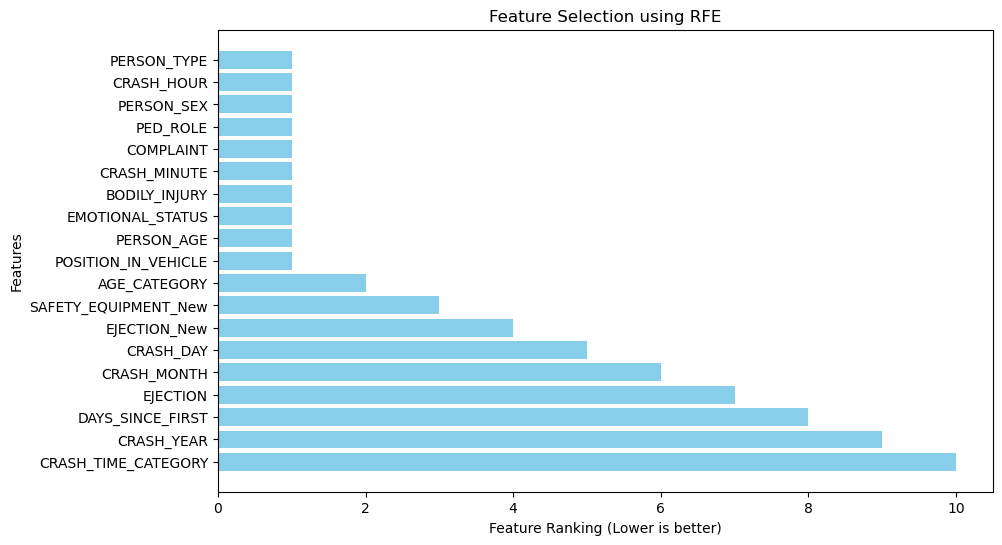

In [297]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature rankings
feature_ranking = rfe.ranking_

# Get feature names and rankings
features = X_train.columns
ranking = np.array(feature_ranking)

# Sort features based on importance (lower rank = more important)
sorted_indices = np.argsort(ranking)
sorted_features = features[sorted_indices]
sorted_ranking = ranking[sorted_indices]

# Plot the feature rankings
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_ranking, color='skyblue')
plt.xlabel('Feature Ranking (Lower is better)')
plt.ylabel('Features')
plt.title('Feature Selection using RFE')
plt.gca().invert_yaxis()  # Invert y-axis to show the best features at the top
plt.show()


In [299]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [301]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # For ROC curve

In [303]:
# Print Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43363
           1       0.00      0.00      0.00       170

    accuracy                           1.00     43533
   macro avg       0.50      0.50      0.50     43533
weighted avg       0.99      1.00      0.99     43533



C:\Users\ANAS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANAS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANAS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


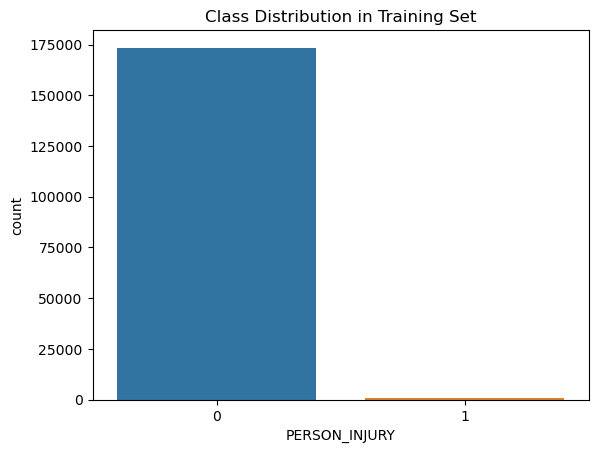

In [305]:
import seaborn as sns

sns.countplot(x=y_train)  # Check the imbalance
plt.title("Class Distribution in Training Set")
plt.show()


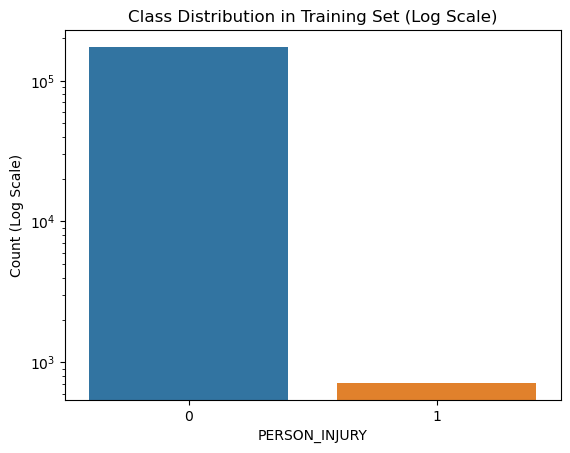

In [330]:
sns.countplot(x=y_train)
plt.yscale("log")
plt.title("Class Distribution in Training Set (Log Scale)")
plt.xlabel("PERSON_INJURY")
plt.ylabel("Count (Log Scale)")
plt.show()


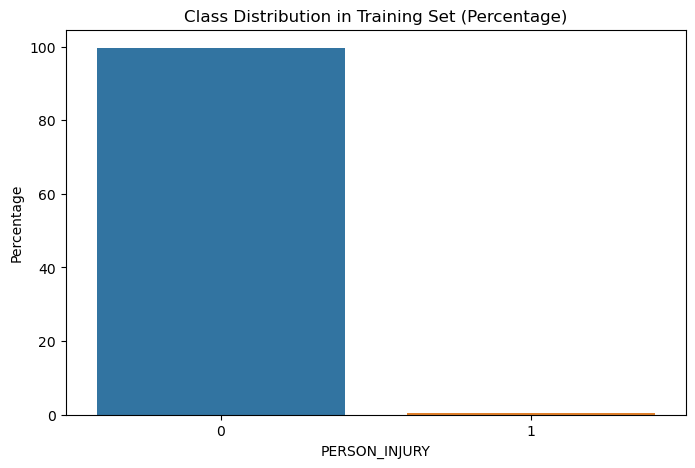

In [337]:
class_counts = y_train.value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution in Training Set (Percentage)")
plt.xlabel("PERSON_INJURY")
plt.ylabel("Percentage")
plt.show()



In [342]:
# Count the occurrences of each class
class_counts = y_train.value_counts()

# Print the counts
print("Class Distribution in Training Set:")
print(class_counts)

# Display percentages
print("\nPercentage Distribution:")
print(class_counts / class_counts.sum() * 100)


Class Distribution in Training Set:
PERSON_INJURY
0    173414
1       714
Name: count, dtype: int64

Percentage Distribution:
PERSON_INJURY
0    99.589957
1     0.410043
Name: count, dtype: float64


In [307]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.3, random_state=42)  # Adjust ratio as needed
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution after SMOTE:", y_train_resampled.value_counts())

Class distribution after SMOTE: PERSON_INJURY
0    173414
1     52024
Name: count, dtype: int64


In [309]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Reduce class 0
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)


<h4>Using Logistic Regression</h4>

In [311]:
# Train Logistic Regression Again
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Print New Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.87      0.93     43363
           1       0.01      0.47      0.03       170

    accuracy                           0.86     43533
   macro avg       0.51      0.67      0.48     43533
weighted avg       0.99      0.86      0.92     43533



<h4>Using Rendom Forest</h4>

In [357]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96     43363
           1       0.03      0.66      0.07       170

    accuracy                           0.93     43533
   macro avg       0.52      0.80      0.51     43533
weighted avg       0.99      0.93      0.96     43533



In [356]:
from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


C:\Users\ANAS\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\ANAS\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


In [352]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print("Class distribution after undersampling:\n", y_resampled.value_counts())


Class distribution after undersampling:
 PERSON_INJURY
0    1428
1     714
Name: count, dtype: int64


In [354]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)


C:\Users\ANAS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
rom imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)


In [ ]:

# Predict on the test set
y_pred = model.predict(X_test_scaled)


<h4>confusion_matrix & Random Forest Classifier with Class Weights</h4>

In [346]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8639
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93     43363
           1       0.01      0.47      0.03       170

    accuracy                           0.86     43533
   macro avg       0.51      0.67      0.48     43533
weighted avg       0.99      0.86      0.92     43533

Confusion Matrix:
 [[37529  5834]
 [   90    80]]


</h2>Random Forest Classifier with Class Weights</h2>

In [669]:
from sklearn.utils.class_weight import compute_class_weight
# Compute Class Weights (Since data is imbalanced)
class_weights = dict(zip(np.unique(y_train), compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)))

# Initialize Random Forest Model with class weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)

# Train the Model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[43359     4]
 [  113    57]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     43363
           1       0.93      0.34      0.49       170

    accuracy                           1.00     43533
   macro avg       0.97      0.67      0.75     43533
weighted avg       1.00      1.00      1.00     43533



<h4>AUC-ROC Score:</h4>

In [324]:
from sklearn.metrics import roc_auc_score

# Only if it's a binary classification problem
auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f"AUC-ROC Score: {auc:.4f}")


AUC-ROC Score: 0.8011


In [344]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print("Class distribution after undersampling:\n", y_resampled.value_counts())


Class distribution after undersampling:
 PERSON_INJURY
0    1428
1     714
Name: count, dtype: int64


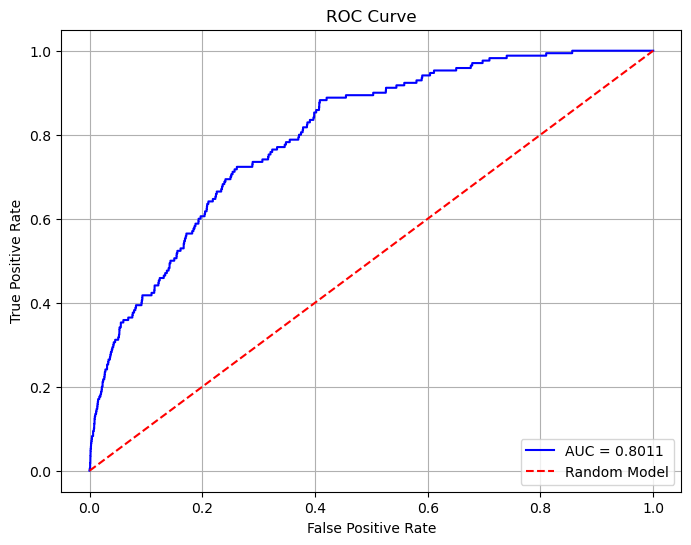

In [326]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for the positive class
y_probs = model.predict_proba(X_test_scaled)[:, 1]  

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Model')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


This data have a dominative columns like number of injured to fatal is very low so my mode fatch the error and can't predict proparly, The data is inbalance 